In [ ]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np

from student_client import create_student_gym_env

env = create_student_gym_env(user_token='lucas_test1', server_url='http://localhost:8001')
env.reset()

2026-02-18 15:00:51,127 - student_client.student_gym_env - INFO - Client is up to date (version 0.1)
2026-02-18 15:00:51,128 - student_client.student_gym_env - INFO - Created new session: 5e3a299c-9861-470c-97e6-37b2608b68bb
2026-02-18 15:00:52,270 - student_client.student_gym_env - INFO - Created new episode: cc6589a2-b9f7-4583-8b2d-ef96bca08121
2026-02-18 15:00:52,271 - student_client.student_gym_env - INFO - StudentGymEnv initialized with episode cc6589a2-b9f7-4583-8b2d-ef96bca08121
2026-02-18 15:00:53,221 - student_client.student_gym_env - INFO - Episode cc6589a2-b9f7-4583-8b2d-ef96bca08121 reset successfully


(array([7.9857220e+02, 1.9450346e+04, 3.3645947e+02, 1.1231659e+03,
        3.7270650e-01, 1.3659774e+06, 3.9613555e+03, 0.0000000e+00,
        1.0319707e+01], dtype=float32),
 {'step': 0,
  'episode_id': 'cc6589a2-b9f7-4583-8b2d-ef96bca08121',
  'terminated': False,
  'truncated': False})

In [10]:
# Reset environment to get initial observation
obs, info = env.reset()
print(f"📋 Starting episode {info.get('episode_id', 'unknown')}")

obs.shape, info

2026-02-18 15:00:54,212 - student_client.student_gym_env - INFO - Episode cc6589a2-b9f7-4583-8b2d-ef96bca08121 reset successfully


📋 Starting episode cc6589a2-b9f7-4583-8b2d-ef96bca08121


((9,),
 {'step': 0,
  'episode_id': 'cc6589a2-b9f7-4583-8b2d-ef96bca08121',
  'terminated': False,
  'truncated': False})

In [11]:
# Initialize data collection arrays
observations = []
actions = []
rewards = []
total_timesteps = 0

for step in range(50):

    # Choose a random action (0=do nothing, 1=repair, 2=sell)
    action = env.action_space.sample()
    print(action)

    # Take step in environment
    obs_result, reward, terminated, truncated, info = env.step(
        action=action,
    )

    print(f'obs_result: {obs_result.shape}')

    observations.append(obs_result)
    actions.append(action)

    rewards.append(reward)

    # Update total timesteps - server advances by step_size but returns only final observation
    total_timesteps = info['step']

    # Print progress every step
    if step % 1 == 0:
        print(f" Step {total_timesteps}: Reward={reward:.2f}, Total={sum(rewards):.2f}")

    # Check if episode ended
    if terminated or truncated:
        print(f"🏁 Episode ended at step {total_timesteps} with reward={reward:.2f}")
        break


# Print summary statistics
total_reward = sum(rewards)
print(f"\n Episode Summary:")
print(f"   Total Steps: {len(actions)}")
print(f"   Total Reward: {total_reward:.2f}")
print(f"   Actions Taken: {len([a for a in actions if a == 1])} repairs, {len([a for a in actions if a == 2])} sell")

0
obs_result: (10, 9)
 Step 9: Reward=446.05, Total=446.05
1
obs_result: (10, 9)
 Step 19: Reward=-544.27, Total=-98.21
0
obs_result: (10, 9)
 Step 29: Reward=403.39, Total=305.17
2
Episode cc6589a2-b9f7-4583-8b2d-ef96bca08121 reached termination state, reason: sold
obs_result: (1, 9)
 Step 31: Reward=125.65, Total=430.82
🏁 Episode ended at step 31 with reward=125.65

 Episode Summary:
   Total Steps: 4
   Total Reward: 430.82
   Actions Taken: 1 repairs, 1 sell


In [12]:
# Finish episode
env.close()

2026-02-18 15:01:04,756 - student_client.student_gym_env - INFO - Closed environment cc6589a2-b9f7-4583-8b2d-ef96bca08121


In [13]:
len(observations), len(actions)

(4, 4)

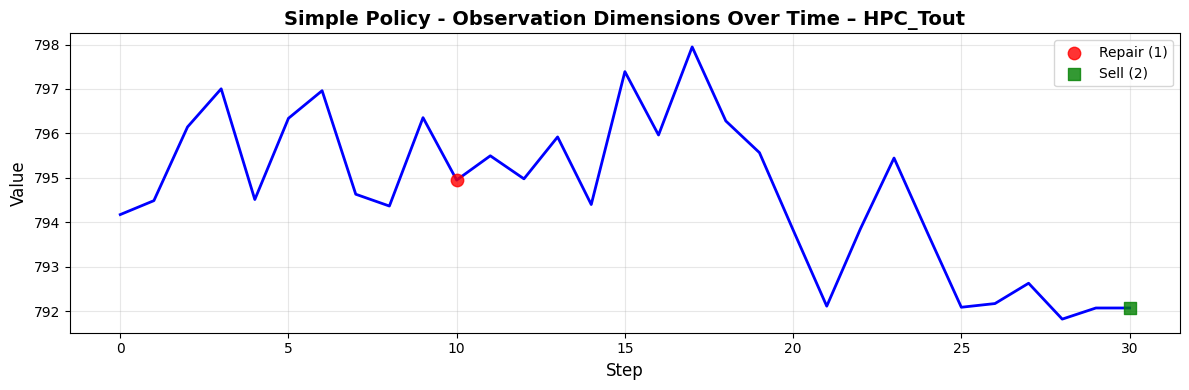

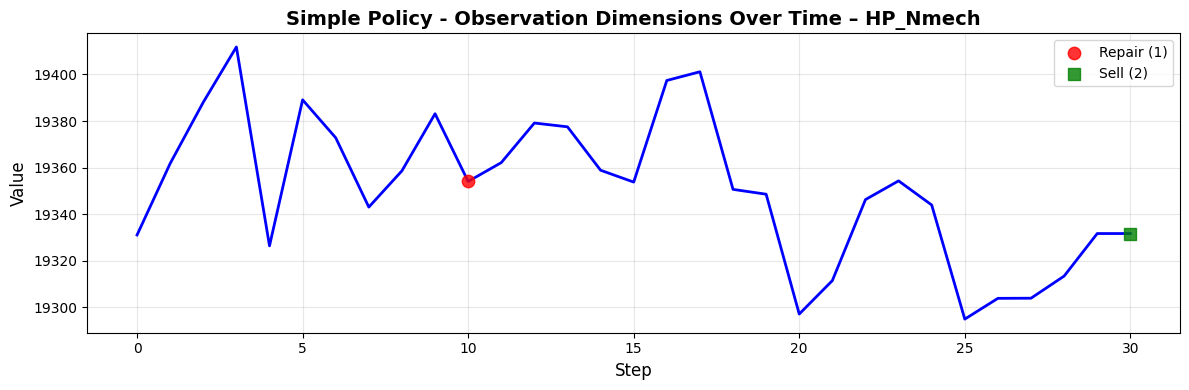

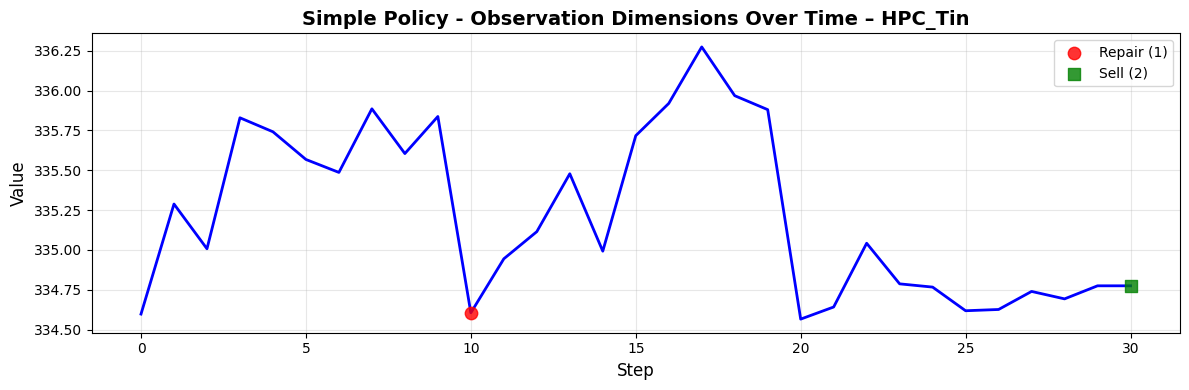

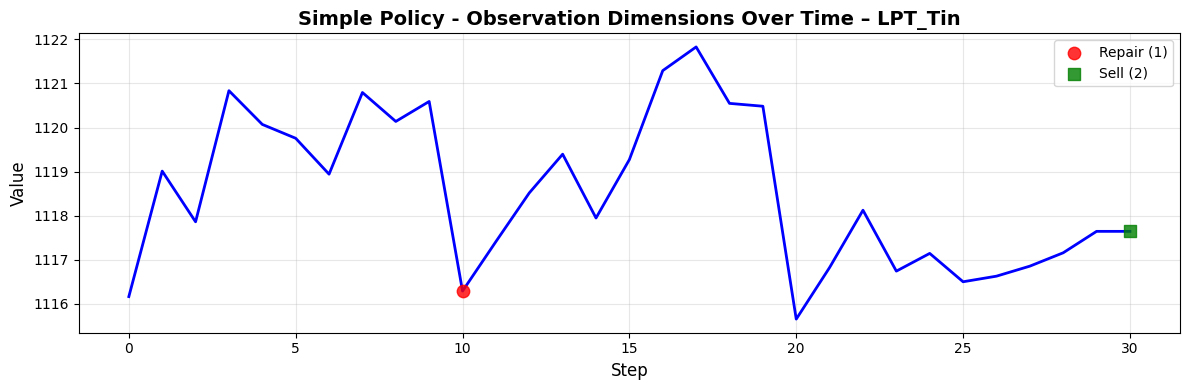

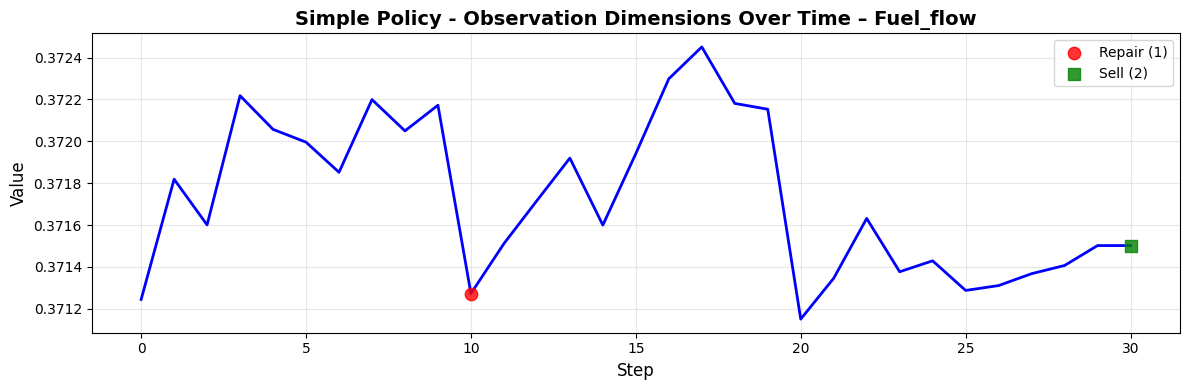

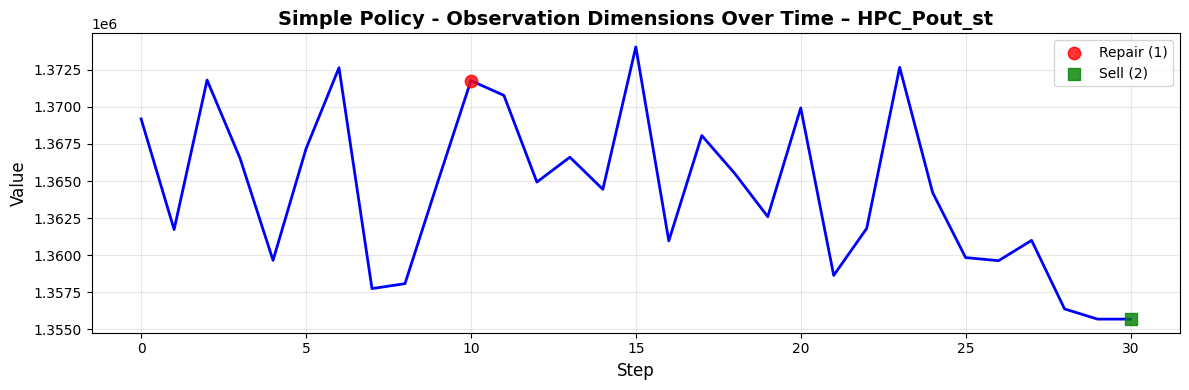

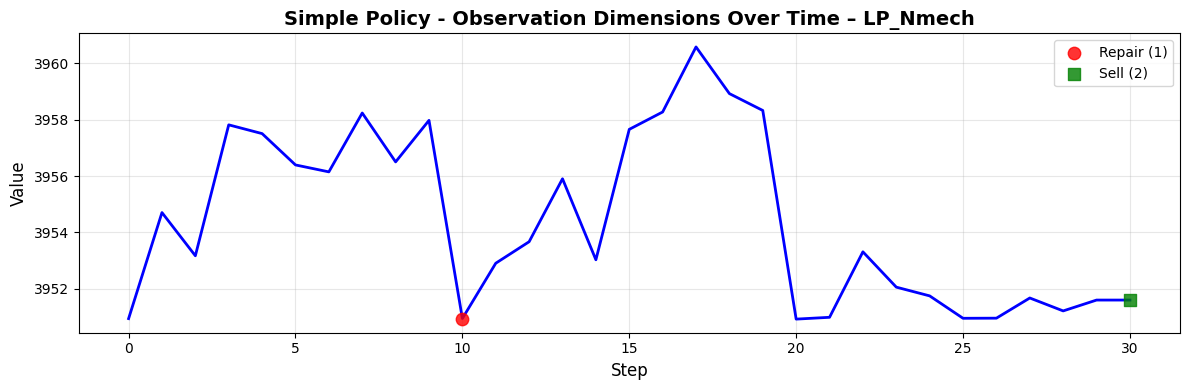

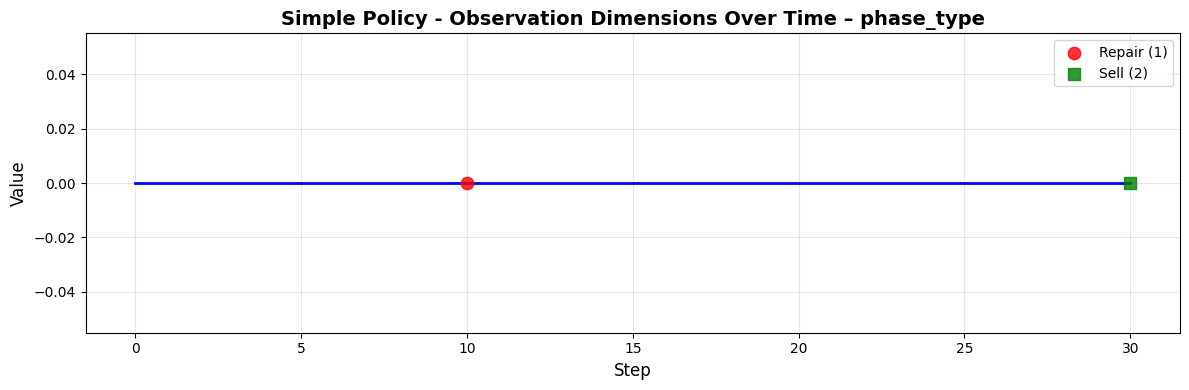

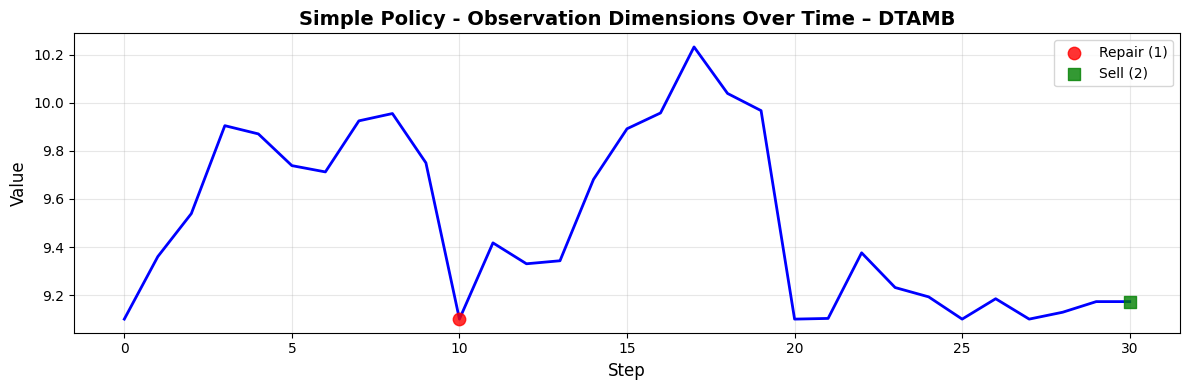

In [15]:
from student_client.plotting import plot_observations


plot_observations(
        observations=observations,
        actions=actions,
        title="Simple Policy - Observation Dimensions Over Time"
    )

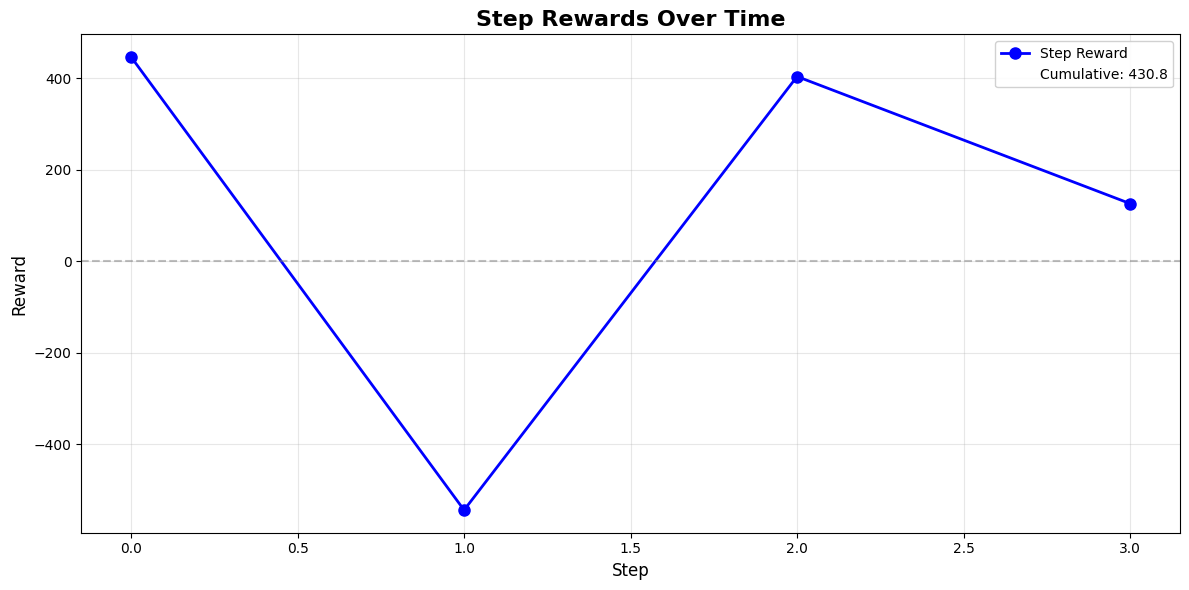

📊 Reward Statistics:
   Total Steps: 4
   Total Reward: 430.82
   Average Reward: 107.71
   Max Reward: 446.05
   Min Reward: -544.27


In [16]:
from student_client.plotting import plot_rewards

plot_rewards(rewards=rewards)